# PVICE & Relog - PCA baselines for Si & CdTe

ReEDS installation projections from the Solar Futures Study, published by DOE on 2021.

Scenario Interest: 
o	95-by-35+Elec.Adv+DR ,  a.k.a. "Solar Futures Decarbonization + Electrification scenario"

This code performs three Methods to output files for the Mass Flows:
<ol>
    <li> PCA original data by ReEDS </li>
    <li> PCA data reordered based on ascending production up to 2035, and then descending, </li>
    <li> PCA data calculated with an exponencial that mathces the cumulative 2035 and 2050 targets </li>
</ol>

In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

cwd = os.getcwd()
testfolder = os.path.join(cwd, 'TEMP')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)
print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in /Users/mmendez/Documents/Postdoc/Software_dev/RICE/1_PV_ICE_waste_calculations/TEMP


In [3]:
PV_ICE.__version__

'v0.2.0+369.g0f4ce08.dirty'

## 1. Create Scenarios

### A. Reading a standard ReEDS output file

In [4]:
reedsFile = os.path.join(cwd, 'baselines','December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx')
print ("Input file is stored in %s" % reedsFile)


Input file is stored in /Users/mmendez/Documents/Postdoc/Software_dev/RICE/1_PV_ICE_waste_calculations/baselines/December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx


In [5]:
REEDSInput = pd.read_excel(reedsFile,
#                        sheet_name="new installs PV (2)")
                       sheet_name="new installs PV")

#index_col=[0,2,3]) #this casts scenario, PCA and State as levels


### B. Save Input Files by PCA

#### Create a copy of the REEDS Input and modify structure for PCA focus

In [6]:
rawdf = REEDSInput.copy()
rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True) #tech=pvtotal from "new installs PV sheet", so can drop
rawdf.set_index(['Scenario','Year','PCA'], inplace=True)
rawdf.head(21)

Capacity (GW)
Scenario     Year PCA               
95-by-35.Adv 2010 p1        0.000017
             2011 p1        0.005158
             2012 p1        0.005158
             2013 p1        0.007146
             2014 p1        0.007146
             2015 p1        0.018253
             2016 p1        0.018253
             2017 p1        0.019460
             2018 p1        0.019460
             2019 p1        0.036320
             2020 p1        0.036320
             2021 p1        0.002434
             2022 p1        0.002434
             2023 p1        0.010066
             2024 p1        0.010066
             2025 p1        0.049445
             2026 p1        0.049445
             2027 p1        0.051342
             2028 p1        0.051342
             2029 p1        0.105931
             2030 p1        0.105931

#### Loading Module Baseline. Will be used later to populate all the columns other than 'new_Installed_Capacity_[MW]' which will be supplied by the REEDS model

In [7]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='cSi', massmodulefile= os.path.join(cwd, 'baselines', 'baseline_modules_mass_US_cSi.csv'))
# MAC: I think we probably want noCircularity so everything goes to landfill and
# it's easy to calculate the 'BEST case for Recycling scenario'. Otherwise comment out...
r1.scenMod_noCircularity() 


baseline = r1.scenario['cSi'].dataIn_m
baseline = baseline.drop(columns=['new_Installed_Capacity_[MW]'])
baseline.set_index('year', inplace=True)
baseline.index = pd.PeriodIndex(baseline.index, freq='A')  # A -- Annual
baseline.head()

r1.createScenario(name='CdTe', massmodulefile=os.path.join(cwd, 'baselines','baseline_modules_mass_US_CdTe.csv'))
# MAC: I think we probably want noCircularity so everything goes to landfill and
# it's easy to calculate the 'BEST case for Recycling scenario'. Otherwise comment out...
r1.scenMod_noCircularity() 
baselineCdTe = r1.scenario['CdTe'].dataIn_m
baselineCdTe = baselineCdTe.drop(columns=['new_Installed_Capacity_[MW]'])
baselineCdTe.set_index('year', inplace=True)
baselineCdTe.index = pd.PeriodIndex(baselineCdTe.index, freq='A')  # A -- Annual
baselineCdTe.head()

path = /Users/mmendez/Documents/Postdoc/Software_dev/RICE/1_PV_ICE_waste_calculations/TEMP


mod_eff  mod_reliability_t50  mod_reliability_t90  mod_degradation  \
year                                                                       
1995      0.0                  0.0                  0.0              0.0   
1996      0.0                  0.0                  0.0              0.0   
1997      0.0                  0.0                  0.0              0.0   
1998      0.0                  0.0                  0.0              0.0   
1999      0.0                  0.0                  0.0              0.0   

      mod_lifetime  mod_MFG_eff  mod_Repair  mod_MerchantTail  \
year                                                            
1995           0.0          0.0         0.0               0.0   
1996           0.0          0.0         0.0               0.0   
1997           0.0          0.0         0.0               0.0   
1998           0.0          0.0         0.0               0.0   
1999           0.0          0.0         0.0               0.0   

      mod_EOL_collection_eff  mod_EOL_pg0_resell  mod_EOL_pg1_landfill  \
year                                                                     
1995                     0.0                 0.0                 100.0   
1996                     0.0                 0.0                 100.0   
1997                     0.0                 0.0                 100.0   
1998                     0.0                 0.0                 100.0   
1999                     0.0                 0.0                 100.0   

      mod_EOL_pg2_stored  mod_EOL_pg3_reMFG  mod_EOL_pg4_recycled  \
year                                                                
1995                 0.0                0.0                   0.0   
1996                 0.0                0.0                   0.0   
1997                 0.0                0.0                   0.0   
1998                 0.0                0.0                   0.0   
1999                 0.0                0.0                   0.0   

      mod_EOL_reMFG_yield  mod_EOL_sp_reMFG_recycle  mod_EOL_pb1_landfill  \
year                                                                        
1995                  0.0                       0.0                 100.0   
1996                  0.0                       0.0                 100.0   
1997                  0.0                       0.0                 100.0   
1998                  0.0                       0.0                 100.0   
1999                  0.0                       0.0                 100.0   

      mod_EOL_pb2_stored  mod_EOL_pb3_reMFG  mod_EOL_pb4_recycled  
year                                                               
1995                 0.0                0.0                   0.0  
1996                 0.0                0.0                   0.0  
1997                 0.0                0.0                   0.0  
1998                 0.0                0.0                   0.0  
1999                 0.0                0.0                   0.0

#### For each Scenario and for each PCA, combine with baseline and save as input file

In [8]:
#### Set header dynamically
import csv

massmodulefile = os.path.join(cwd, 'baselines', 'baseline_modules_mass_US_cSi.csv')

with open(massmodulefile, newline='') as f:
    reader = csv.reader(f)
    row1 = next(reader)  # gets the first line
    row2 = next(reader)  # gets the first line

row11 = 'year'
for x in row1[1:]:
    row11 = row11 + ',' + x 

row22 = 'year'
for x in row2[1:]:
    row22 = row22 + ',' + x 

#### Load MarketShare File

In [9]:
marketsharefile = os.path.join(cwd, 'baselines','output_RELOG_cSi_CdTe_capacity_reeds.csv')
marketshare = pd.read_csv(marketsharefile)
# Not elegant but I need to trim down to ReEds year start which is 2010
marketshare = marketshare[marketshare['year']>=2010].reset_index(drop=True)
marketshare.set_index('year', inplace=True)
marketshare.head()

Nameplate Capacity (MW)  cSi Market Share  CdTe Market Share  \
year                                                                 
2010                  848.588              0.85               0.14   
2011                 1920.510              0.93               0.06   
2012                 3373.427              0.91               0.07   
2013                 4765.802              0.85               0.10   
2014                 6243.873              0.60               0.35   

      cSi Capacity (MW)  CdTe Capacity (MW)  
year                                         
2010          721.29980           118.80232  
2011         1786.07430           115.23060  
2012         3069.81857           236.13989  
2013         4050.93170           476.58020  
2014         3746.32380          2185.35555

In [10]:
# Hack for plots.
sparkplot = True
xvals = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
             '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
             '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033',
             '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041',
             '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
             '2050']
plt.rcParams.update({'font.size': 8})


#### Method 1 

In [11]:
reorganize = False

In [12]:
for ii in range (len(rawdf.unstack(level=1))):
    PCA = rawdf.unstack(level=1).iloc[ii].name[1] #This one iterates over the pca names: p1 to p99
    SCEN = rawdf.unstack(level=1).iloc[ii].name[0] #This one iterates over all scenario names: 
                                                   # 95-by-35+Elec.Adv, 95-by-35.Adv, Reference.Adv+DR, etc
    SCEN=SCEN.replace('+', '_')
    filetitle = SCEN+'_cSI_'+PCA +'.csv' #These lines, 2 to 5 will allow to make file names
    subtestfolder = os.path.join(testfolder, 'PCAs_RELOG_Method1') # Create folder of the scenarios
    if not os.path.exists(subtestfolder): # Create folder if it doen's exist
        os.makedirs(subtestfolder)
    filetitle = os.path.join(subtestfolder, filetitle)
    A = rawdf.unstack(level=1).iloc[ii]
    A = A.droplevel(level=0)
    A.name = 'new_Installed_Capacity_[MW]'
    A = pd.DataFrame(A)
    A.index=pd.PeriodIndex(A.index, freq='A')
    A = pd.DataFrame(A)
    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['cSi Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    # Sort Ascending 2022 to 2035 new_Installed_Capacity_[MW]
    # Sort Descending 2035 to 2050 new_Installed_Capacity_[MW]
    if reorganize:
        sortedB = (list(B.iloc[0:12]['new_Installed_Capacity_[MW]'].values) + list(B.iloc[12:25]['new_Installed_Capacity_[MW]'].sort_values().values)
        +list(B.iloc[25::]['new_Installed_Capacity_[MW]'].sort_values(ascending=False).values))
        sortedBdf = pd.DataFrame(sortedB, index = A.index, columns =['new_Installed_Capacity_[MW]'])
        B = sortedBdf.reindex(A.index)
    # Add other columns
    B = pd.concat([B, baseline.reindex(A.index)], axis=1)
   
    header = row11 + '\n' + row22 + '\n'
    
    # SPARK PLOT
    if sparkplot:
        sparkplotfolder = os.path.join(subtestfolder, 'SPARKPLOTS')
        if not os.path.exists(sparkplotfolder):
            os.makedirs(sparkplotfolder)

        fig, axs = plt.subplots(figsize=(8, 5), facecolor='w', edgecolor='k')
        plt.plot(xvals, B['new_Installed_Capacity_[MW]'].values)
        plt.xticks(rotation=45)
        figtitle = 'PV ICE ' + SCEN + ' Baseline_Csi_'+PCA+'.png'
        fig.savefig(os.path.join(sparkplotfolder, figtitle), dpi=600)
        plt.close(fig) # This avoids the figure from displayig and getting all the warnings
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    
    filetitle = SCEN+'_CdTe_'+PCA +'.csv'
    filetitle = os.path.join(subtestfolder, filetitle)

    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['CdTe Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    if reorganize:
        sortedB = (list(B.iloc[0:12]['new_Installed_Capacity_[MW]'].values) + list(B.iloc[12:25]['new_Installed_Capacity_[MW]'].sort_values().values)
        +list(B.iloc[25::]['new_Installed_Capacity_[MW]'].sort_values(ascending=False).values))
        sortedBdf = pd.DataFrame(sortedB, index = A.index, columns =['new_Installed_Capacity_[MW]'])
        B = sortedBdf.reindex(A.index)
    # Add other columns
    B = pd.concat([B, baseline.reindex(A.index)], axis=1)
    
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    

#### Method 2

In [ ]:
for ii in range (len(rawdf.unstack(level=1))):
    PCA = rawdf.unstack(level=1).iloc[ii].name[1] #This one iterates over the pca names: p1 to p99
    SCEN = rawdf.unstack(level=1).iloc[ii].name[0] #This one iterates over all scenario names: 95-by-35+Elec.Adv, 95-by-35.Adv, Reference.Adv+DR, etc
    SCEN=SCEN.replace('+', '_')
    filetitle = SCEN+'_cSI_'+PCA +'.csv' #These lines, 2 to 5 will allow to make file names
    subtestfolder = os.path.join(testfolder, 'PCAs_RELOG_Method2') # Create folder of the scenarios
    if not os.path.exists(subtestfolder): # Create folder if it doen's exist
        os.makedirs(subtestfolder)
    filetitle = os.path.join(subtestfolder, filetitle)
    A = rawdf.unstack(level=1).iloc[ii]
    A = A.droplevel(level=0)
    A.name = 'new_Installed_Capacity_[MW]'
    A = pd.DataFrame(A)
    A.index=pd.PeriodIndex(A.index, freq='A')
    A = pd.DataFrame(A)
    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['cSi Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    # Sort Ascending 2022 to 2035 new_Installed_Capacity_[MW]
    # Sort Descending 2035 to 2050 new_Installed_Capacity_[MW]
    if reorganize:
        sortedB = (list(B.iloc[0:12]['new_Installed_Capacity_[MW]'].values) + list(B.iloc[12:25]['new_Installed_Capacity_[MW]'].sort_values().values)
        +list(B.iloc[25::]['new_Installed_Capacity_[MW]'].sort_values(ascending=False).values))
        sortedBdf = pd.DataFrame(sortedB, index = A.index, columns =['new_Installed_Capacity_[MW]'])
        B = sortedBdf.reindex(A.index)
    # Add other columns
    B = pd.concat([B, baseline.reindex(A.index)], axis=1)
   
    header = row11 + '\n' + row22 + '\n'
    
    # SPARK PLOT
    if sparkplot:
        fig, axs = plt.subplots(figsize=(8, 5), facecolor='w', edgecolor='k')
        plt.plot(xvals, B['new_Installed_Capacity_[MW]'].values)
        plt.xticks(rotation=45)
        figtitle = 'PV ICE ' + SCEN + ' Baseline_Csi_'+PCA+'.png'
        fig.savefig(os.path.join(sparkplotfolder, figtitle), dpi=600)
        plt.close(fig) # This avoids the figure from displayig and getting all the warnings
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    
    filetitle = SCEN+'_CdTe_'+PCA +'.csv'
    filetitle = os.path.join(subtestfolder, filetitle)

    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['CdTe Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    if reorganize:
        sortedB = (list(B.iloc[0:12]['new_Installed_Capacity_[MW]'].values) + list(B.iloc[12:25]['new_Installed_Capacity_[MW]'].sort_values().values)
        +list(B.iloc[25::]['new_Installed_Capacity_[MW]'].sort_values(ascending=False).values))
        sortedBdf = pd.DataFrame(sortedB, index = A.index, columns =['new_Installed_Capacity_[MW]'])
        B = sortedBdf.reindex(A.index)
    # Add other columns
    B = pd.concat([B, baseline.reindex(A.index)], axis=1)
    
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    

#### Method 3 

In [ ]:
interpolate2035 = True

In [ ]:
# LINEAR
# some sort of exponential growth that still sums up tthe correct capacity would be ideal.
# Currently jsut doing a linear division per year per location
# Based on cumulative sum from 2022 to 2035, and 2035 to 2050.
# yearly2035 = B.iloc[12:26]['new_Installed_Capacity_[MW]'].sum()/len(B.iloc[12:26])
# yearly2050 = B.iloc[26::]['new_Installed_Capacity_[MW]'].sum()/len(B.iloc[26::])

In [ ]:
for ii in range (len(rawdf.unstack(level=1))):
    PCA = rawdf.unstack(level=1).iloc[ii].name[1] #This one iterates over the pca names: p1 to p99
    SCEN = rawdf.unstack(level=1).iloc[ii].name[0] #This one iterates over all scenario names: 95-by-35+Elec.Adv, 95-by-35.Adv, Reference.Adv+DR, etc
    SCEN=SCEN.replace('+', '_')
    filetitle = SCEN+'_cSI_'+PCA +'.csv' #These lines, 2 to 5 will allow to make file names
    subtestfolder = os.path.join(testfolder, 'PCAs_RELOG_Method3') # Create folder of the scenarios
    if not os.path.exists(subtestfolder): # Create folder if it doen's exist
        os.makedirs(subtestfolder)
    filetitle = os.path.join(subtestfolder, filetitle)
    A = rawdf.unstack(level=1).iloc[ii]
    A = A.droplevel(level=0)
    A.name = 'new_Installed_Capacity_[MW]'
    A = pd.DataFrame(A)
    A.index=pd.PeriodIndex(A.index, freq='A')
    A = pd.DataFrame(A)
    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['cSi Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    # Sort Ascending 2022 to 2035 new_Installed_Capacity_[MW]
    # Sort Descending 2035 to 2050 new_Installed_Capacity_[MW]
    if interpolate2035:
        # LINEAR
        # some sort of exponential growth that still sums up tthe correct capacity would be ideal.
        # Currently jsut doing a linear division per year per location
        yearly2035 = B.iloc[12:26]['new_Installed_Capacity_[MW]'].sum()/len(B.iloc[12:26])
        yearly2050 = B.iloc[26::]['new_Installed_Capacity_[MW]'].sum()/len(B.iloc[26::])
        n2022= B.iloc[12].name
        n2035= B.iloc[25].name
        n2036= B.iloc[26].name
        n2050= B.iloc[-1].name
        B.loc[n2022:n2035, 'new_Installed_Capacity_[MW]' ] = yearly2035
        B.loc[n2036:n2050, 'new_Installed_Capacity_[MW]' ] = yearly2050
    # Add other columns
    B = pd.concat([B, baseline.reindex(A.index)], axis=1)
   
    header = row11 + '\n' + row22 + '\n'
    
    # SPARK PLOT
    if sparkplot:
        fig, axs = plt.subplots(figsize=(8, 5), facecolor='w', edgecolor='k')
        plt.plot(xvals, B['new_Installed_Capacity_[MW]'].values)
        plt.xticks(rotation=45)
        figtitle = 'PV ICE ' + SCEN + ' Baseline_Csi_'+PCA+'.png'
        fig.savefig(os.path.join(sparkplotfolder, figtitle), dpi=600)
        plt.close(fig) # This avoids the figure from displayig and getting all the warnings
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    
    filetitle = SCEN+'_CdTe_'+PCA +'.csv'
    filetitle = os.path.join(subtestfolder, filetitle)

    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['CdTe Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    if interpolate2035:
        # LINEAR
        # some sort of exponential growth that still sums up tthe correct capacity would be ideal.
        # Currently jsut doing a linear division per year per location
        yearly2035 = B.iloc[12:26]['new_Installed_Capacity_[MW]'].sum()/len(B.iloc[12:26])
        yearly2050 = B.iloc[26::]['new_Installed_Capacity_[MW]'].sum()/len(B.iloc[26::])
        n2022= B.iloc[12].name
        n2035= B.iloc[25].name
        n2036= B.iloc[26].name
        n2050= B.iloc[-1].name
        B.loc[n2022:n2035, 'new_Installed_Capacity_[MW]' ] = yearly2035
        B.loc[n2036:n2050, 'new_Installed_Capacity_[MW]' ] = yearly2050    # Add other columns
    B = pd.concat([B, baseline.reindex(A.index)], axis=1)
    
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    

#### Method 4

Creates a monotonically increasing deployment based on the cumulative betwen 2022 to 2035, and 2036 to 2050.

First it calculates the cumulatives, then normalizes by 105 (for 14 years monotonically increasing) or 120 (for 15 years monotonically increasing), and then it does a loop to calculate each year

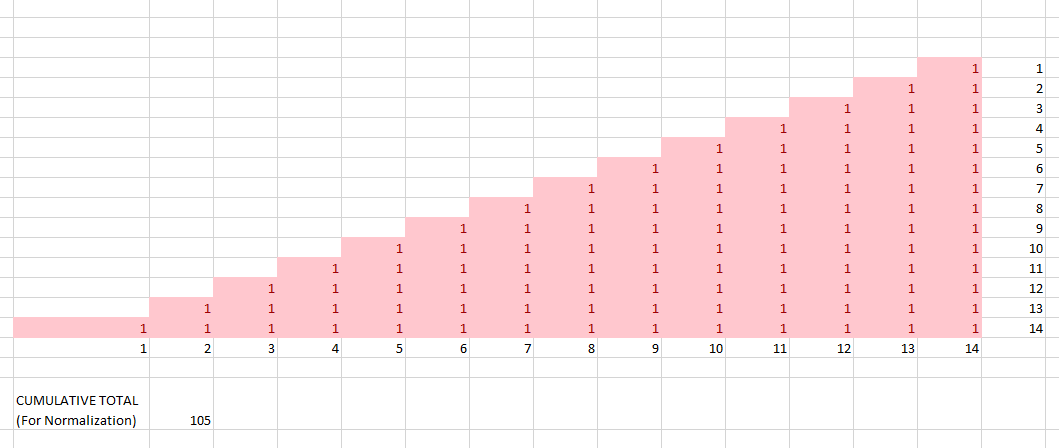

Other options based on this method: 
* increasing o the cumulative between 2022 to 2050 --> divide by 435 instead and set kk to loop 0 to 29 
* Or increasing between 2022 to 2035, and decreasing for 2036 to 2050 

In [ ]:
# Heathers suggestion
# Which I didnt really follow but would be better than the linear

from scipy.optimize import curve_fit
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [ ]:
#generae a dataset for the area in between
mod_eff_late = mod_eff_raw.loc[(mod_eff_raw.index>=2020)]

y_dummy = power_law(mod_eff_late.index-2019, mod_eff_late['mod_eff'][2020], 0.065) #17.9
#played around with the exponential until y_dummy[31] closely matched projected 25.06% value. CITE
print(y_dummy[-1])
plt.plot(y_dummy)#create a dataframe of the projection

mod_eff_late['mod_eff'] = y_dummy
#print(mod_eff_late)
plt.plot(mod_eff_late)
#mod_eff_late.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_module_eff_perovskite.csv', index=True)